<a href="https://colab.research.google.com/github/wal-03/CapStone-Project-1-Data-Mining/blob/main/Insight_CapStone_1_D_Group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Some Python Modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings; warnings.simplefilter('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#from kmodes.kmodes import KModes
#from kmodes.kprototypes import KPrototypes

import pickle

from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI

#from sklearn_extra.cluster import KMedoids

In [ ]:
url = 'https://raw.githubusercontent.com/Jepees/Data-Mining-Dani/refs/heads/main/CapStone-01/alumni_preprocessed.csv'

# Membaca data dari file CSV
df = pd.read_csv(url)

# Menampilkan beberapa baris pertama dari DataFrame
df.head(30)

,Timestamp,Program Studi,Tahun Masuk UIN Jakarta,Tahun Wisuda,Bulan Wisuda,Status saat ini,Waktu Mendapatkan Pekerjaan,Perusahaan,Posisi,Tahun Wirausaha,Bidang wirausaha,Penghasilan,Tahun Masuk S2,Universitas S2,Tahun Masuk S3,Universitas S3,Nama Prodi S2/S3,Kesesuaian Kurikulum,Kesesuaian Bidang Ilmu,Saran
0,2024-06-04 11:27:37,Prodi Agribisnis S1,2018,2024,Mei,sedang mencari kerja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,NaN
1,2024-06-04 11:28:30,Prodi Agribisnis S1,2018,2024,Mei,Karyawan Swasta,6.0,AHHA Korpora Indonesia,Host Live,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,NaN
2,2024-06-04 11:28:55,Prodi Agribisnis S1,2017,2024,Mei,sedang mencari kerja,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,NaN
3,2024-06-04 11:29:04,Prodi Agribisnis S1,2019,2024,Mei,sedang mencari kerja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,NaN
4,2024-06-04 11:30:08,Prodi Agribisnis S1,2018,2024,Mei,Pengajar,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,NaN
5,2024-06-04 11:30:54,Prodi Agribisnis S1,2019,2024,Mei,sedang mencari kerja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,NaN
6,2024-06-04 11:34:17,Prodi Kimia,2010,2014,November,ASN/PNS,3.0,Pemerintah Kota Tangerang Selatan,Pranata Laboratorium Kemetrologian Ahli Pertama,NaN,NaN,NaN,2018.0,UI,NaN,NaN,Teknik Kimia,4,3,"Tingkatkan lagi perkuliahan dengan dosen tamu,..."
7,2024-06-04 12:04:36,Prodi Kimia,2019,2023,Februari,Karyawan Swasta,3.0,Monarch Multi Industries,QC Head,NaN,NaN,5000000.0,NaN,NaN,NaN,NaN,NaN,3,3,NaN
8,2024-06-04 12:07:40,Prodi Agribisnis S1,2018,2024,Mei,sedang mencari kerja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,NaN
9,2024-06-05 15:37:22,Prodi Agribisnis S1,2019,2024,Mei,sedang mencari kerja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Timestamp                    433 non-null    object 
 1   Program Studi                433 non-null    object 
 2   Tahun Masuk UIN Jakarta      433 non-null    int64  
 3   Tahun Wisuda                 433 non-null    int64  
 4   Bulan Wisuda                 433 non-null    object 
 5   Status saat ini              421 non-null    object 
 6   Waktu Mendapatkan Pekerjaan  273 non-null    float64
 7   Perusahaan                   220 non-null    object 
 8   Posisi                       223 non-null    object 
 9   Tahun Wirausaha              30 non-null     float64
 10  Bidang wirausaha             31 non-null     object 
 11  Penghasilan                  204 non-null    float64
 12  Tahun Masuk S2               27 non-null     float64
 13  Universitas S2      

In [ ]:
#melakukan perubahan tipe data
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Program Studi'] = df['Program Studi'].astype('category')
df['Tahun Masuk UIN Jakarta'] = df['Tahun Masuk UIN Jakarta'].astype('Int64')
df['Tahun Wisuda'] = df['Tahun Wisuda'].astype('Int64')
df['Bulan Wisuda'] = df['Bulan Wisuda'].astype('category')
df['Status saat ini'] = df['Status saat ini'].astype('category')
df['Waktu Mendapatkan Pekerjaan'] = df['Waktu Mendapatkan Pekerjaan'].astype('Int64')
df['Tahun Wirausaha'] = df['Tahun Wirausaha'].astype('Int64')
df['Penghasilan'] = df['Penghasilan'].astype('Int64')
df['Tahun Masuk S2'] = df['Tahun Masuk S2'].astype('Int64')
df['Universitas S2'] = df['Universitas S2'].astype("category")
df['Tahun Masuk S3'] = df['Tahun Masuk S3'].astype('Int64')
df['Universitas S3'] = df['Universitas S3'].astype("category")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Timestamp                    433 non-null    datetime64[ns]
 1   Program Studi                433 non-null    category      
 2   Tahun Masuk UIN Jakarta      433 non-null    Int64         
 3   Tahun Wisuda                 433 non-null    Int64         
 4   Bulan Wisuda                 433 non-null    category      
 5   Status saat ini              421 non-null    category      
 6   Waktu Mendapatkan Pekerjaan  273 non-null    Int64         
 7   Perusahaan                   220 non-null    object        
 8   Posisi                       223 non-null    object        
 9   Tahun Wirausaha              30 non-null     Int64         
 10  Bidang wirausaha             31 non-null     object        
 11  Penghasilan                  204 non-null    

# Insigt dan Saran dari Visualisasi

## 1. Countplot Kategorik

<Figure size 640x480 with 0 Axes>

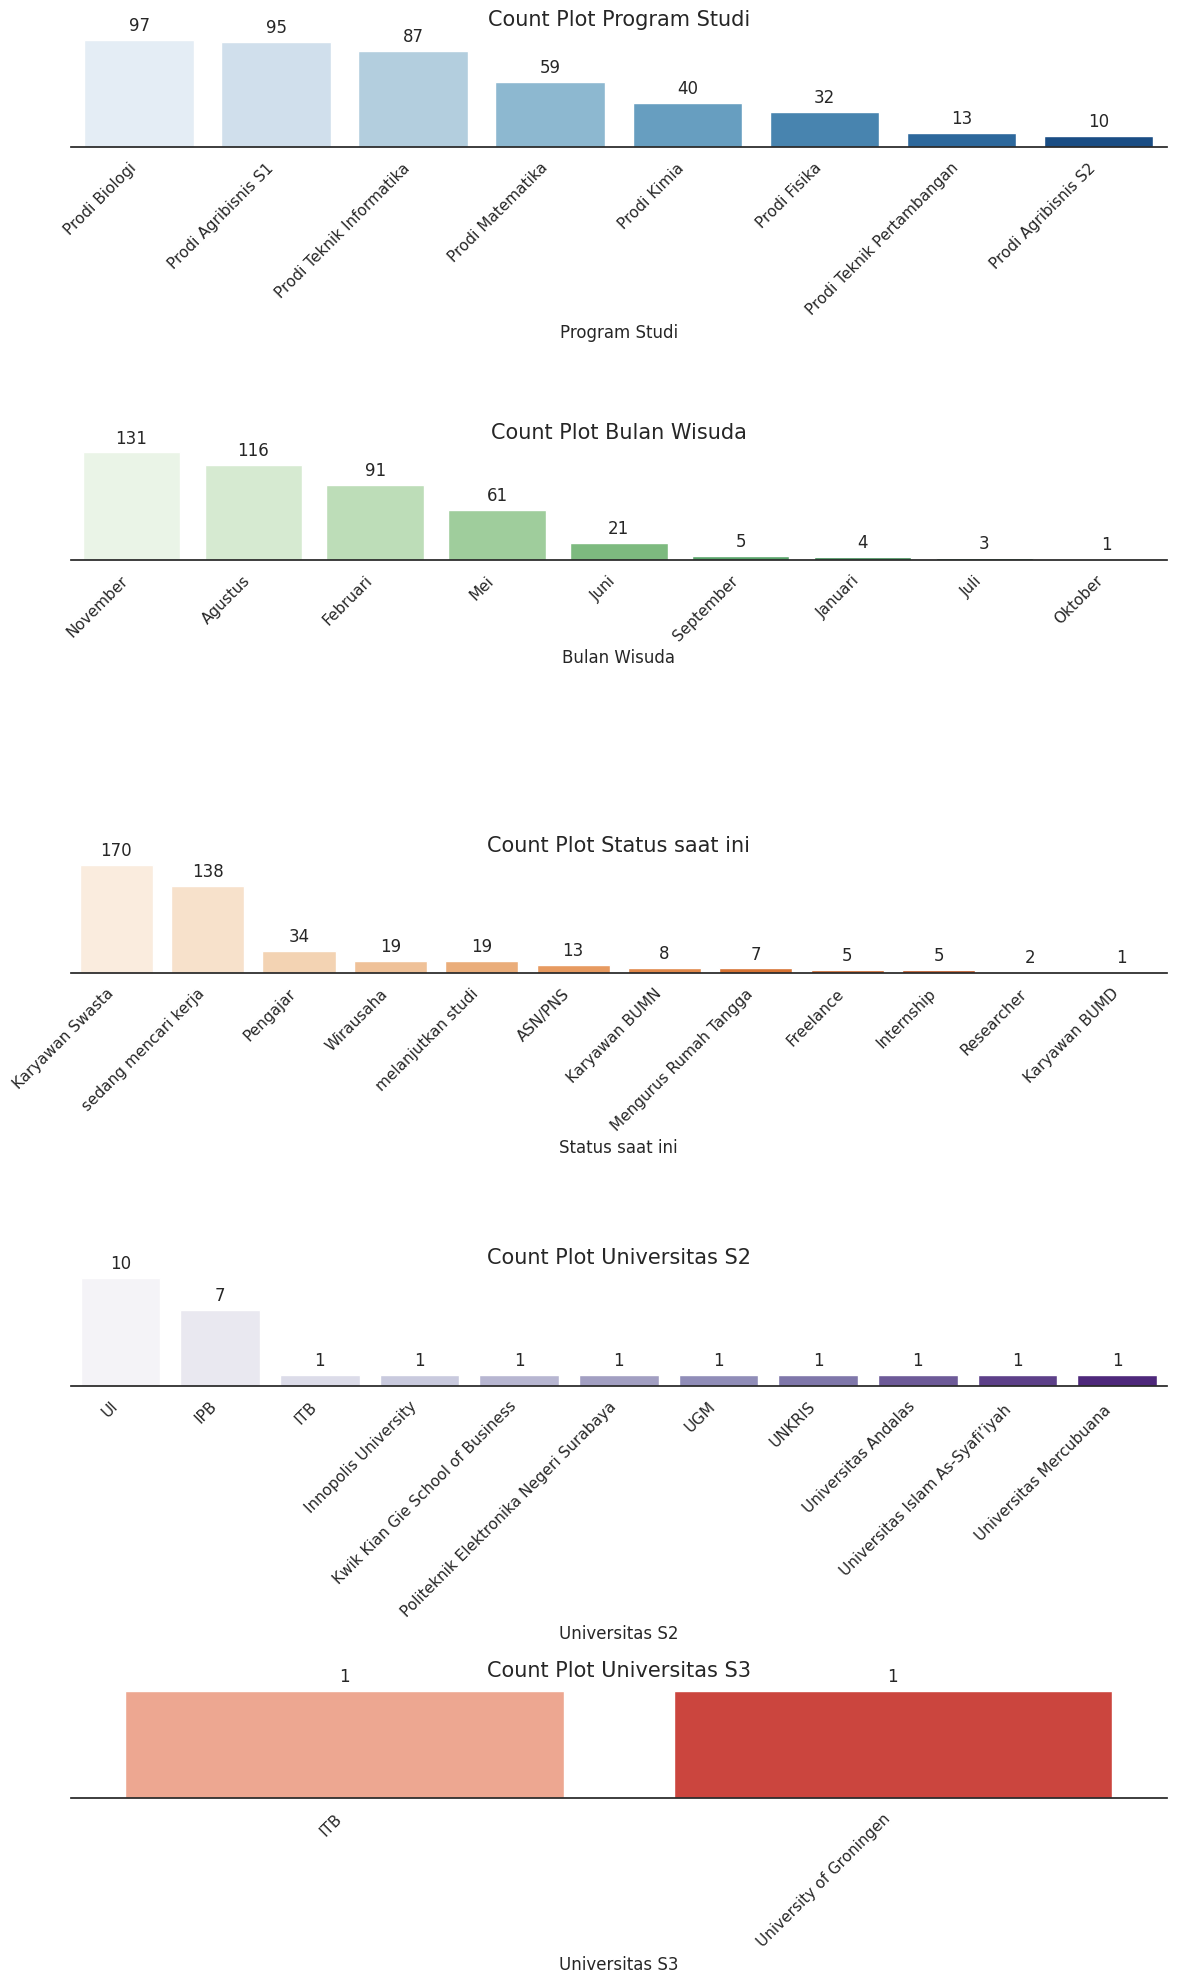

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns
kategorik = ['Program Studi', 'Bulan Wisuda', 'Status saat ini', 'Universitas S2', 'Universitas S3']

# Set seaborn style
sns.set(style='white')
plt.clf()

# List of color palettes (extendable)
palettes = ['Blues', 'Greens', 'Oranges', 'Purples', 'Reds', 'coolwarm']

# Adjusting the number of subplots based on the number of categorical features
n_features = len(kategorik)
fig, axs = plt.subplots(n_features, 1, figsize=(12, 4 * n_features))

# Create count plots for each categorical column
for i, kol2 in enumerate(kategorik):
    # Ensure column exists and is not empty
    if df[kol2].notna().sum() > 0:  # Check for non-null values
        # Cycle through the palettes to avoid running out
        palette = palettes[i % len(palettes)]

        # Generate the count plot with a different color palette
        sns.countplot(x=df[kol2].dropna(), order=df[kol2].value_counts().index, ax=axs[i], palette=palette)
        axs[i].set_title(f'Count Plot {kol2}', fontsize=15)

        # Rotate the x-axis labels if necessary
        plt.setp(axs[i].get_xticklabels(), rotation=45, ha='right')  # Correct method to rotate and align labels

        # Annotate the bar heights
        for p in axs[i].patches:
            axs[i].annotate(format(p.get_height(), '.0f'),
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', xytext=(0, 10),
                            textcoords='offset points')

        # Hide the right, top, and left spines
        sns.despine(right=True, top=True, left=True)

        # If desired, hide the y-axis values or keep them visible
        axs[i].axes.yaxis.set_visible(False)
    else:
        # If column has no valid data, show a warning title
        axs[i].set_title(f'No valid data for {kol2}', fontsize=15)

plt.tight_layout()

# Show the plot
plt.show()


Nampak bahwa banya alumni dari beberapa prodi yang enggan untuk mengisi form entah apa alasannya. Perhatikan juga ketertarikan alumni ke bidang wirausaha sangat minim hanya kurang dari 5% responden yang memilih untuk berwirausaha.
Saran kami bisa menghimbau alumni untuk mengisi form alumni agar data lengkap, terutama untuk prodi yang sedikit mengisinya seperti Teknik Pertambangan, Fisika dan kimia. Dengan begitu pengambilan kesimpulan akan lebih baik.

## 2. Program studi yang mahasiswanya cenderung lulus di atas waktu normal kuliah (di atas 4 tahun)

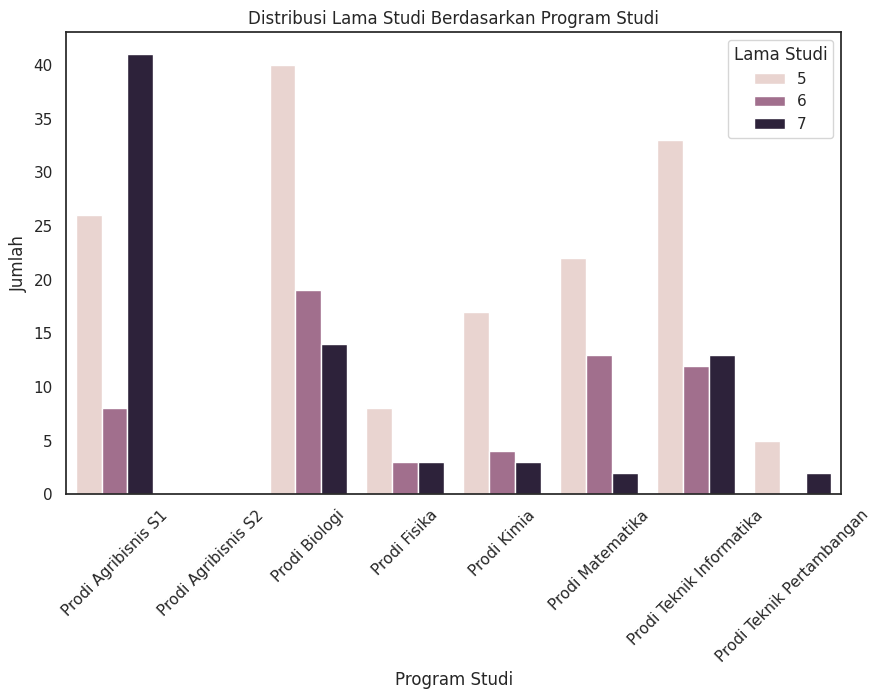

In [ ]:
df['Lama Studi'] = df['Tahun Wisuda'] - df['Tahun Masuk UIN Jakarta']

dff1= df[(df['Lama Studi'] > 4) & (df['Program Studi'] != 'Prodi Agribisnis S2')]
plt.figure(figsize=(10, 6))
sns.countplot(data=dff1, x='Program Studi', hue='Lama Studi')

# Mengatur label dan judul
plt.xlabel('Program Studi')
plt.ylabel('Jumlah')
plt.title('Distribusi Lama Studi Berdasarkan Program Studi')

# Menampilkan plot
plt.xticks(rotation=45)
plt.show()

Hampir 90% dari responden yang berprogram studi agribisnis S1 nampak lulus di atas 4 tahun. Bahkan 50% dari mereka lulus 7 tahun. Saran untuk prodi:
- Mengadakan semester pendek bagi para mahasiswanya untuk mempermudah kelulusan
- Penyederhanaan atau pembaruan kurikulum.
- Beri kemudahan pada proyek akhir (skripsi), bisa diganti dengan penerbitan jurnal atau skripsi bsia dimulai di semester yang lebih rendah
- Prodi dapat mempertimbangkan menawarkan mata kuliah yang sama di tiap semester, sehingga mahasiswa tidak perlu menunggu lama jika mengulang.

## 3. Bagaimana hubungan program studi dengan status saat ini ?

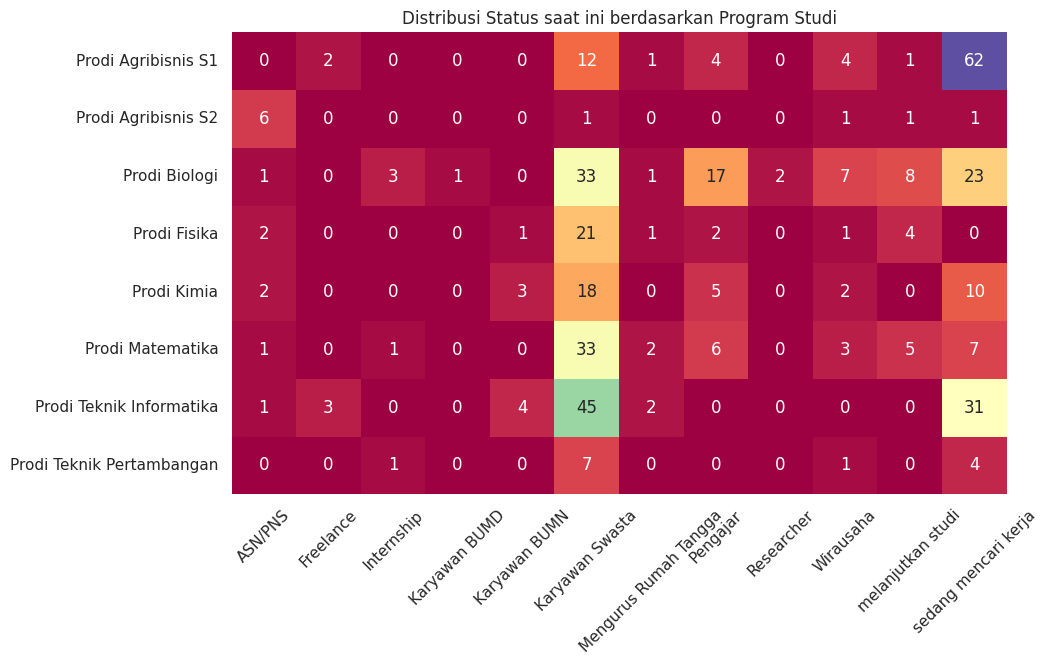

In [ ]:
# Membuat tabel crosstab antara Program Studi dan Status saat ini
crosstab = pd.crosstab(df['Program Studi'], df['Status saat ini'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Spectral', cbar=False)
plt.title('Distribusi Status saat ini berdasarkan Program Studi')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


Nampak alumni yang sangat kesulitan mencari pekerjaan berasal dari prodi agri S1. Bahkan 30% dari total responden nampak kesulitan mencari pekerjaan. Saran kami coba minta mahasiwanya menghubungi pendahulu atau teman mereka yang sudah mendapat pekerjaan, coba apply di tempat mereka bekerja. Kemudian untuk membuat mata kuliah techno supaya lebih ramah dan lebih asyik di mahasiswa, ajari betul ke mereka terkait wirausaha, buat ketertarikan yang tinggi terhadap wirausaha ke mahasiswa agar saat kesulitan mencari pekerjaan masih memiliki alternatif penghasilan lain. kemudian perhatikan plot di bawah ini

Status saat ini
Karyawan BUMN                 16500000.0
Wirausaha                12066666.666667
ASN/PNS                   8772727.272727
Karyawan BUMD                  8000000.0
Karyawan Swasta           6753284.671533
melanjutkan studi         6666666.666667
Researcher                     3750000.0
Pengajar                   3356521.73913
Freelance                      3000000.0
Internship                     2500000.0
sedang mencari kerja           2250000.0
Mengurus Rumah Tangga               <NA>
Name: Penghasilan, dtype: Float64


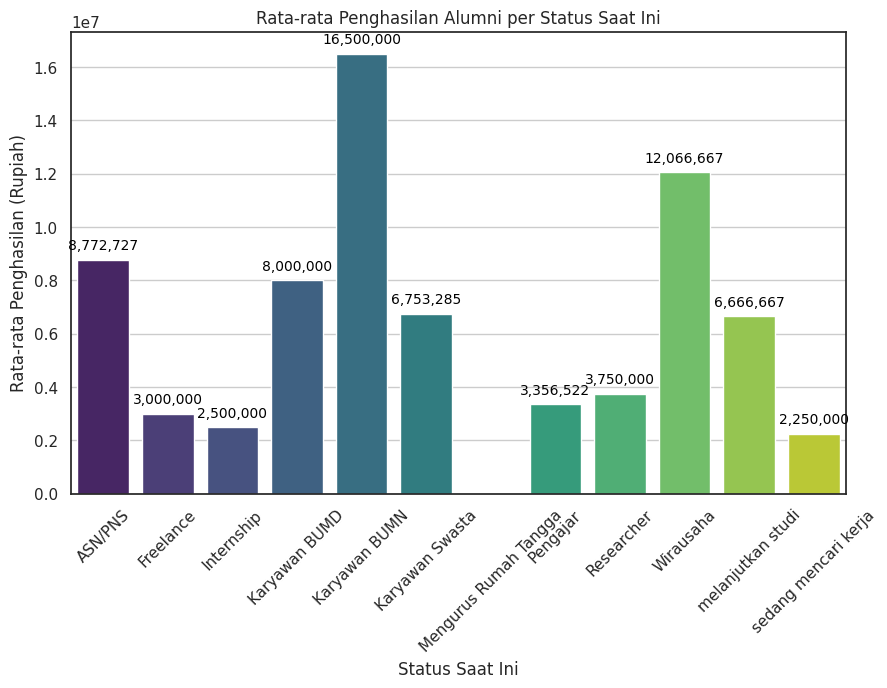

In [ ]:
# Menghitung rata-rata penghasilan per status saat ini
income_summary = df[df['Penghasilan'] <= 100000000].groupby('Status saat ini')['Penghasilan'].mean().sort_values(ascending=False)

# Tampilkan ringkasan rata-rata penghasilan per status saat ini
print(income_summary)

# Visualisasi hasilnya
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=income_summary.index, y=income_summary.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Rata-rata Penghasilan Alumni per Status Saat Ini')
plt.xlabel('Status Saat Ini')
plt.ylabel('Rata-rata Penghasilan (Rupiah)')
plt.grid(axis='y')

# Menambahkan label di atas setiap bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():,.0f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom',
                      fontsize=10, color='black',
                      xytext=(0, 5),
                      textcoords='offset points')

# Menampilkan grafik
plt.show()


Tunjukan ke mereka plot ini dan sadarkan ke mereka bahwa peminat kewirausahaan masih sedikit (berdasarkan countplot di awal tadi) PADAHAL pendahulu mereka yang telah sukses berwirausaha cenderung memiliki penghasilan yang lebih tinggi dibanding mereka yang pekerja konvensional.

## 4. Kecenderungan tidak mendapatkan pekerjaan pada periode waktu tertentu apakah diikuti oleh faktor lain?

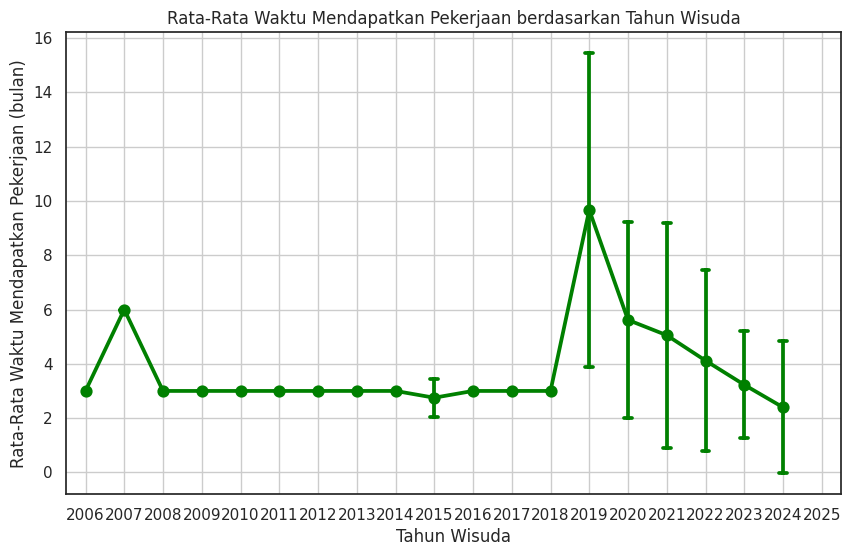

In [ ]:
# Menghitung rata-rata waktu mendapatkan pekerjaan berdasarkan tahun wisuda
plt.figure(figsize=(10, 6))
sns.pointplot(x='Tahun Wisuda', y='Waktu Mendapatkan Pekerjaan', data=df, ci='sd', capsize=0.2, color='green')

# Memberikan judul dan label pada sumbu
plt.title('Rata-Rata Waktu Mendapatkan Pekerjaan berdasarkan Tahun Wisuda')
plt.xlabel('Tahun Wisuda')
plt.ylabel('Rata-Rata Waktu Mendapatkan Pekerjaan (bulan)')

# Menambahkan grid
plt.grid(True)

# Menampilkan visualisasi
plt.show()

Rata rata waktu mendapatkan pekerjaan setelah wisuda cukup stabil. Tetapi semenjak adanya pandami Covid-19 rata rata waktu mendapatkan pekerjaan menjadi tidak stabil di tahun (2019-2022). Namun mulai membaik setelah pandemi berakhir. Jadi tidak perlu khawatir terkait alumni agak kesulitan mencari pekerjaan karena itu terjadi akibat faktor lain. Dengan adanya kasus seperti ini juga ada baiknya mahasiswa disadarkan betapa pentingnya berwirausaha.

## 5. Apa yang bisa kita lakukan setelah melihat penghasilan dari pada alumni?


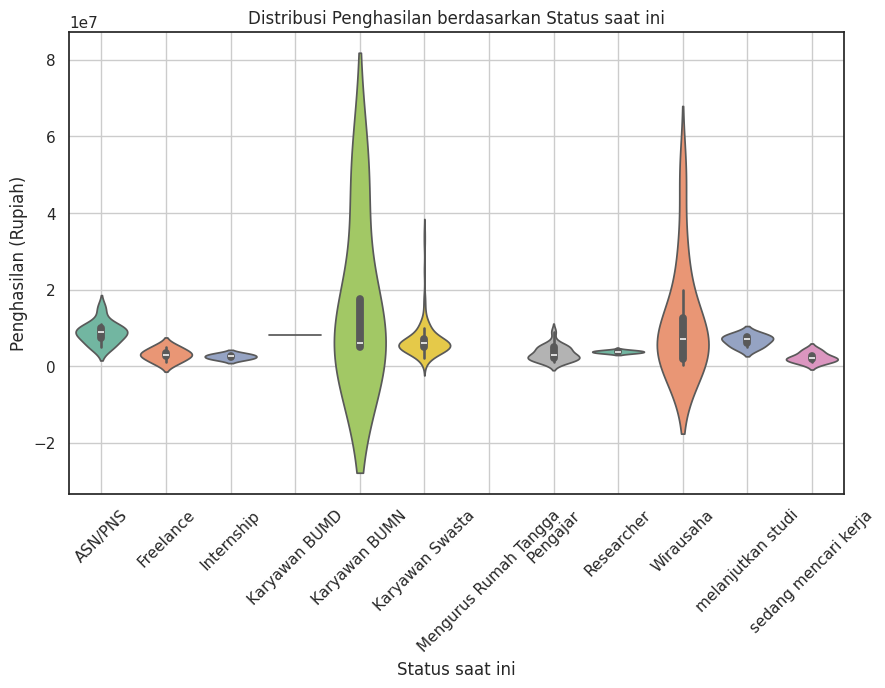

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Status saat ini', y='Penghasilan', data=df[df['Penghasilan'] <= 100000000], palette='Set2')
plt.title('Distribusi Penghasilan berdasarkan Status saat ini')
plt.xlabel('Status saat ini')
plt.ylabel('Penghasilan (Rupiah)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Program Studi
Prodi Fisika                 9839130.434783
Prodi Agribisnis S2          9142857.142857
Prodi Matematika                  7731250.0
Prodi Teknik Informatika     6759183.673469
Prodi Kimia                       6112500.0
Prodi Biologi                5554166.666667
Prodi Teknik Pertambangan    5166666.666667
Prodi Agribisnis S1          4142857.142857
Name: Penghasilan, dtype: Float64


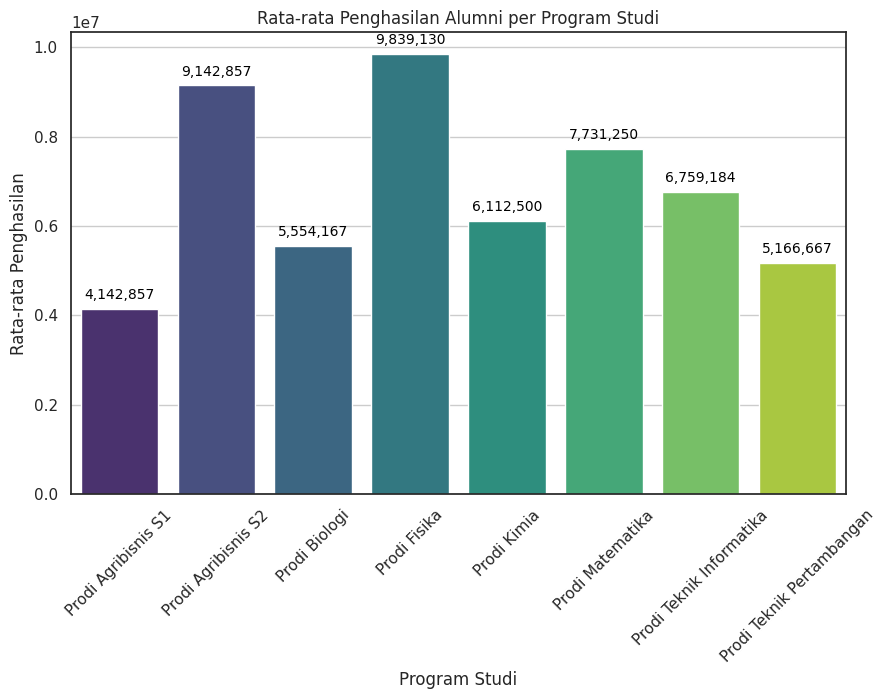

In [ ]:
# Menghitung rata-rata penghasilan per program studi
income_summary = df[df['Penghasilan'] <= 100000000].groupby('Program Studi')['Penghasilan'].mean().sort_values(ascending=False)

# Tampilkan ringkasan rata-rata penghasilan per program studi
print(income_summary)

# Visualisasi hasilnya
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=income_summary.index, y=income_summary.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Rata-rata Penghasilan Alumni per Program Studi')
plt.xlabel('Program Studi')
plt.ylabel('Rata-rata Penghasilan')
plt.grid(axis='y')

# Menambahkan label di atas setiap bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():,.0f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom',
                      fontsize=10, color='black',
                      xytext=(0, 5),
                      textcoords='offset points')

# Menampilkan grafik
plt.show()

Dari dua diagram yang kami tunjukan nampak mereka yang bekerja sebagai karyawan BUMN mendapat penghasilan yang relatif lebih tinggi NAMUN itu juga dipengaruhi oleh faktor berwirausaha. Dengan mengetahui penghasilan lulusan yang telah bekerja atau berwirausaha rata2 berada di atas 5jt. Saran kami coba buat "beasiswa alumni” yang ditujukan untuk mahasiswa aktif. Tadi sudah kami paparkan bahwa banyak dari mereka yang lulus tidak tepat waktu, dan mungkin saja itu dipengaruhi oleh ekonomi beberapa individu mengakibatkan kesulitan menjalani perkuliahan.

Kemudian dari informasi penghasilan ini juga faklutas/universitas bisa melakukan promosi di media sosial. Tunjukan bahwa penghasilan alumni fakultas kita berada di angka2 tersebut. Ini bisa menarik perhatian para calon mahasiswa baru untuk mendaftar di UIN terutama di FST

   Pendidikan_Lanjutan     Penghasilan
0                False  8001030.927835
1                 True       6900000.0


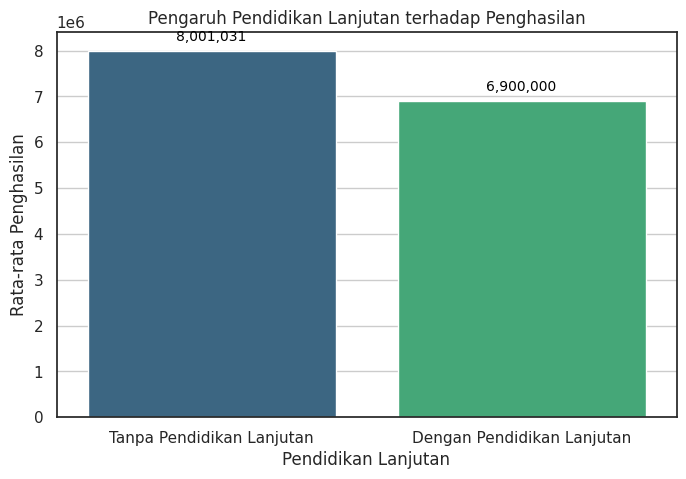

In [ ]:
# Membuat kolom baru untuk menandakan apakah alumni melanjutkan ke S2 atau S3
df['Pendidikan_Lanjutan'] = df['Tahun Masuk S2'].notnull() | df['Tahun Masuk S3'].notnull()

# Menghitung rata-rata penghasilan berdasarkan pendidikan lanjutan
income_summary = df.groupby('Pendidikan_Lanjutan')['Penghasilan'].mean().reset_index()

# Tampilkan ringkasan
print(income_summary)

# Visualisasi rata-rata penghasilan berdasarkan pendidikan lanjutan
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(x='Pendidikan_Lanjutan', y='Penghasilan', data=income_summary, palette='viridis')
plt.xticks(ticks=[0, 1], labels=['Tanpa Pendidikan Lanjutan', 'Dengan Pendidikan Lanjutan'])
plt.title('Pengaruh Pendidikan Lanjutan terhadap Penghasilan')
plt.ylabel('Rata-rata Penghasilan')
plt.xlabel('Pendidikan Lanjutan')
plt.grid(axis='y')

# Menambahkan label di atas setiap bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():,.0f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom',
                      fontsize=10, color='black',
                      xytext=(0, 5),
                      textcoords='offset points')

# Menampilkan grafik
plt.show()

Coba gaet/ajak mahasiswa untuk mengambil studi lanjutan S2 (khususnya di UIN), katakan ke mereka bahwa penghasilan alumni yang menempuh studi lanjutan cenderung lebih besar ketimbang mereka yang hanya S1

## 6. Kemudian adakah cara agar mahasiswa lebih mudah mendapatkan pekerjaan?

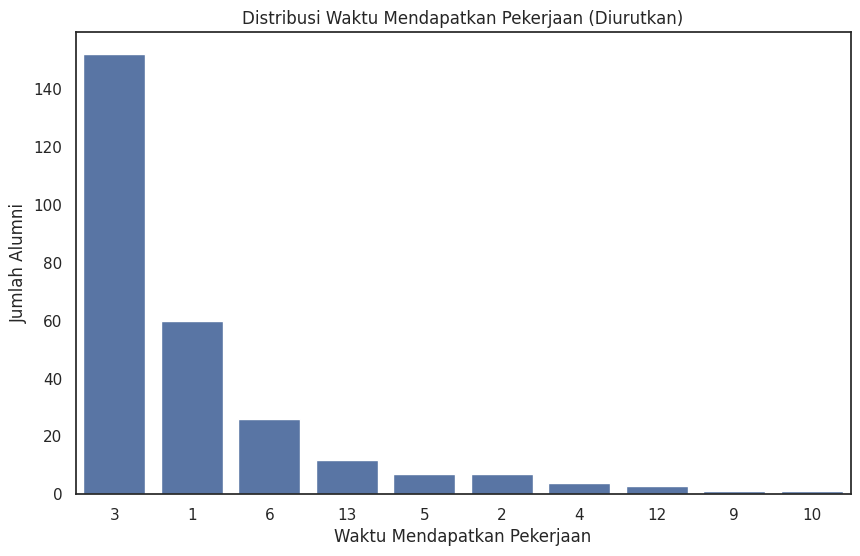

In [ ]:
sorted_counts = df['Waktu Mendapatkan Pekerjaan'].value_counts().sort_values(ascending=False)

# Membuat countplot dengan urutan yang sudah diurutkan
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Waktu Mendapatkan Pekerjaan', order=sorted_counts.index)

# Menambahkan judul dan label sumbu
plt.title('Distribusi Waktu Mendapatkan Pekerjaan (Diurutkan)')
plt.xlabel('Waktu Mendapatkan Pekerjaan')
plt.ylabel('Jumlah Alumni')

# Menampilkan plot
plt.show()

Nampak bahwa 50% dari alumni responden bisa mendapatkan pekerjaan dalam kurun waktu kurang dari 4 bulan. Saran kami coba adakan seminar atau "sharing with alumni" terkait bagaimana cara mendapatkan atau cara melamar pekerjaan yang baik. Atau mungkin strategi bagaimana setelah lulus untuk mempersiapkan dunia kerja dari mereka yang bisa mendapatkan pekerjaan dalam kurun waktu singkat setekah kelulusan.

## 7. Keterkaitan Kesesuaian Kurikulum dan Kesesuaian Bidang Ilmu terhadap penghasilan alumni.

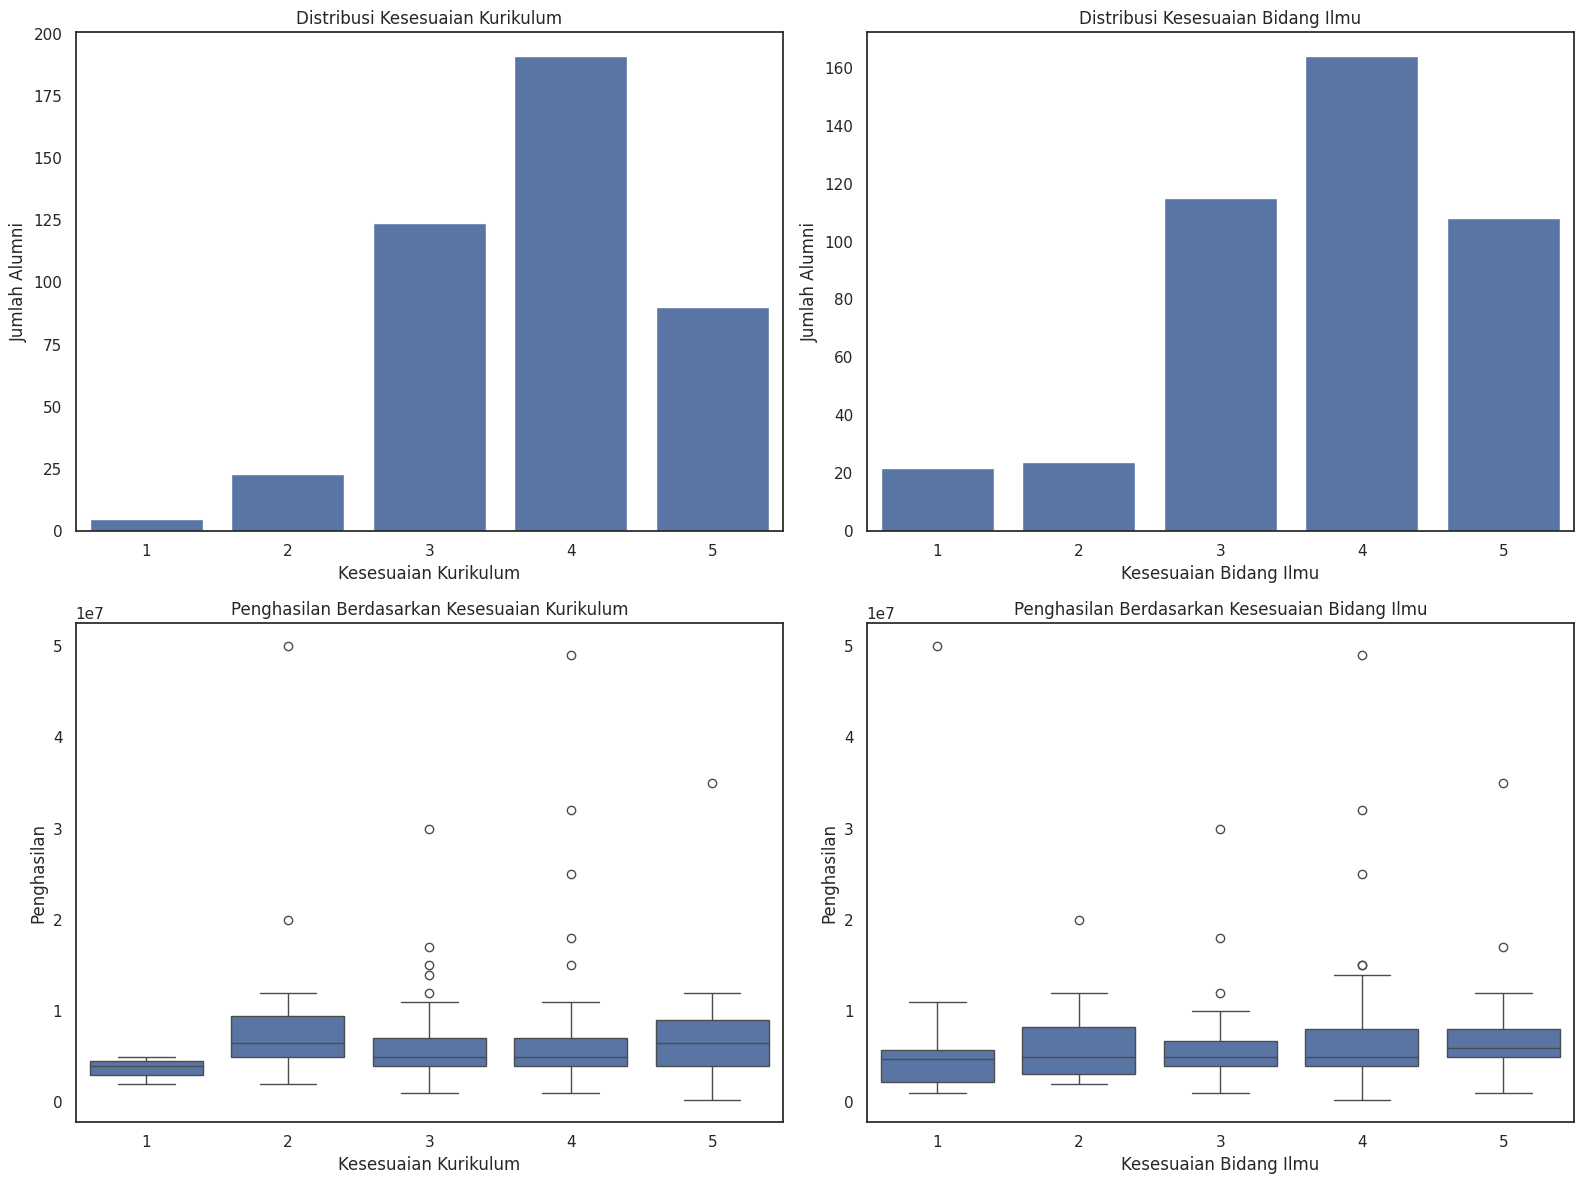

In [ ]:
# Membuat figure dengan 2 baris dan 2 kolom
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

# Countplot untuk 'Kesesuaian Kurikulum' (sekarang di kiri atas)
sns.countplot(data=df, x='Kesesuaian Kurikulum', ax=ax[0, 0])
ax[0, 0].set_title('Distribusi Kesesuaian Kurikulum')
ax[0, 0].set_xlabel('Kesesuaian Kurikulum')
ax[0, 0].set_ylabel('Jumlah Alumni')

# Countplot untuk 'Kesesuaian Bidang Ilmu' (sekarang di kanan atas)
sns.countplot(data=df, x='Kesesuaian Bidang Ilmu', ax=ax[0, 1])
ax[0, 1].set_title('Distribusi Kesesuaian Bidang Ilmu')
ax[0, 1].set_xlabel('Kesesuaian Bidang Ilmu')
ax[0, 1].set_ylabel('Jumlah Alumni')

# Boxplot untuk 'Kesesuaian Kurikulum' dan 'Penghasilan' (tetap di kiri bawah)
sns.boxplot(data=df[df['Penghasilan'] < 100000000], x='Kesesuaian Kurikulum', y='Penghasilan', ax=ax[1, 0])
ax[1, 0].set_title('Penghasilan Berdasarkan Kesesuaian Kurikulum')
ax[1, 0].set_xlabel('Kesesuaian Kurikulum')
ax[1, 0].set_ylabel('Penghasilan')

# Boxplot untuk 'Kesesuaian Bidang Ilmu' dan 'Penghasilan' (tetap di kanan bawah)
sns.boxplot(data=df[df['Penghasilan'] < 100000000], x='Kesesuaian Bidang Ilmu', y='Penghasilan', ax=ax[1, 1])
ax[1, 1].set_title('Penghasilan Berdasarkan Kesesuaian Bidang Ilmu')
ax[1, 1].set_xlabel('Kesesuaian Bidang Ilmu')
ax[1, 1].set_ylabel('Penghasilan')

# Mengatur tata letak agar tidak bertumpukan
plt.tight_layout()

# Menampilkan plot
plt.show()

Nampak mereka yang merasa sistem kurikulum dan bidang ilmu yang mereka dapatkan tidak sesuai dengan pekerjaan mereka cenderung memiliki penghasilan yang lebih kecil ketimbang mereka yang mereasa sistem kurikulum dan bidang ilmu yang mereka dapatkan sesuai dengan pekerjaan mereka saat ini.
Karena sebagian besar responden merasa bahwa kurikulum dan bidang ilmu mereka sudah sesuai dengan dunia industri saat ini, maka cukup artikan bahwa penghasilan yang kecil adalah akibat alumni tidak memilih bidang industri yang sesuai dengan bidang ilmu mereka
Coba sampaikan ke mahasiswa bahwa jika memang ingin mendapatkan penghasilan yang besar, cobalah untuk mencari pekerjaan yang sesusai dengan program studi dan bidang ilmu mereka.


# Saran Untuk Perbaikan Pengumpulan Data (Via G-Form) Kedepannya!!!

**A. Tambahan Pertanyaan**

- **Bidang atau sektor industri apa alumni tersebut bekerja**

industri (misalnya, teknologi, pendidikan, kesehatan) tempat alumni bekerja dapat membantu melihat tren karir lulusan dan sektor mana yang paling banyak menyerap lulusan. Untuk menganalisis apakah sektor tertentu lebih menjanjikan dari segi penghasilan atau kecepatan mendapatkan pekerjaan. Selain itu, kemudian untuk melihat apakah ada keterkaitan antara program studi dan sektor industri yang dimasuki.

- **Daerah Tempat Tinggal**

Guna melihat apakah daerah tertentu cenderung lebih mudah menyerap alumni sebgai pekerja atau malah lebih banyak yang tingkat pengangguran di daerah tsb


- **Input IPK atau Prestasi Akademik**

IPK atau prestasi akademik bisa jadi menjadu faktor yang mempengaruhi kesuksesan dalam mendapatkan pekerjaan atau penghasilan. Kita bisa menganalisis apakah lulusan dengan IPK lebih tinggi mendapatkan pekerjaan lebih cepat, memiliki posisi yang lebih baik, atau penghasilan lebih tinggi dibandingkan dengan mereka yang IPK-nya lebih rendah.


- **Apakah saat berkuliah mereka aktif dalam Organisasi atau kegiatan Ekstrakulikuler**

Dengan ini kita bisa melihat apakah alumni yang aktif berorganisasi mungkin lebih cepat mendapatkan pekerjaan atau lebih cenderung menjadi pemimpin di perusahaan/wirausaha.

**B. Konsistensi pada inputasi G-Form**

- jika memang variabel tersebut harus integer maka paksa pengisi untuk memasukan integer (tahun masuk, penghasilan, tahun lulus, dsb)

- Lakukan juga pada kolom kategorik yang memang sudah fix itemnya (program studi responden)

- Buat pertanyaan (kolom) yang berbeda pada studi lanjut S2 dan S3